# Importing All Necessary Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTENC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Loading the Dataset Using Pandas

In [2]:
# Setting Column Names For The Dataset
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
        'income']

# Reading The Dataset Into A Dataframe, Certain Data Fields Have '?' as null Value
adults = pd.read_csv('./Adults/adult.data', names = cols, index_col = False, na_values = ['?'], skipinitialspace = True)

# Peeking The First 10 Rows Of The Dataset
adults.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Exploration & Analysis of Dataset

## Rough Analysis

In [3]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Through the .info() method, we can see that there are a total of **15 attributes** and **1 output label** - **income**, in the DataFrame.

Observations:

1. Out of the **15 attributes**, 6 of them are numerical data, while the remaining 8 are categorical data.
2. There are a total of **48842 instances**.
3. A total of 3 attributes contain missing values.

### Analysis of Output Label

In [4]:
adults.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

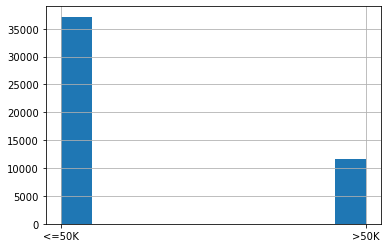

In [5]:
adults.income.hist()
plt.show()

Observations:
1. There are 2 distinct outputs, which makes this a **Binary Classification** task.
2. The no. of people making more than \$50,000 is 11687.
3. The no. of people making at most \$50,000 is 37155.
4. The percentage of people making more than \$50,000 is approximately 23.39\%.
5. This dataset is skewed.
6. Oversampling / Undersampling needs to be performed to balance the majority and minority classes.

### Missing Values

In [6]:
adults.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

We may need to **impute** or **drop** rows with missing values for workclass, occupation, or native-country.

## Statistics of Numerical Attributes

In [7]:
# View the Statistics of the Numerical Data
adults.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Each numerical attribute have very different scales, **feature scaling** is needed.

## Viewing the Histogram for Each Numerical Attribute

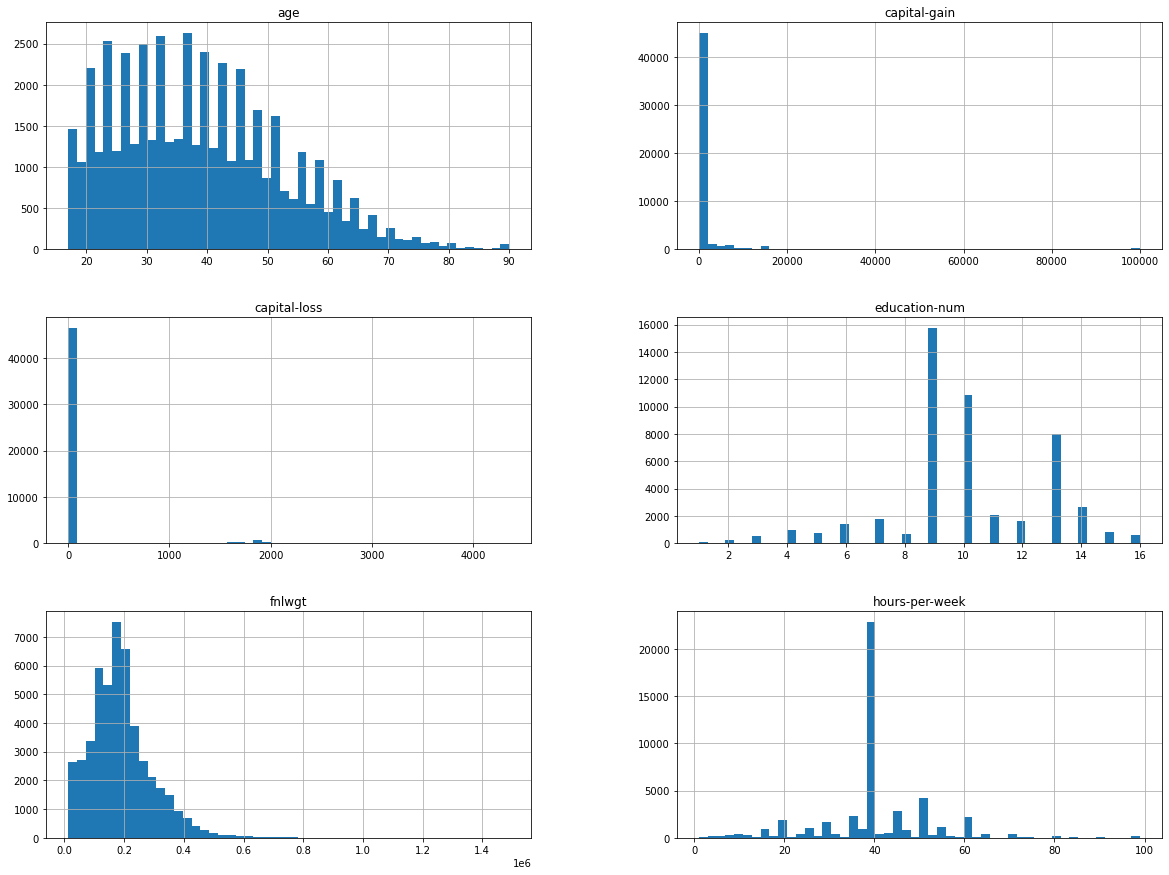

In [8]:
cols = ['age','fnlwgt','education-num','capital-gain','capital-loss', 'hours-per-week']
adults.hist(bins = 50, figsize = (20, 15), column = cols)
plt.show()

Observations:
1. Both ***capital-gain*** and ***capital-loss*** are **tail heavy** and the values have been **capped**.

## Analysis of Categorical Data

In [9]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation',
            'relationship', 'race', 'sex', 'native-country']

for col in cat_cols:
    print(col.title())
    print(adults[col].value_counts(),'\n')

Workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

Education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

Marital-Status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

Occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      608

We need to perform **one-hot encoding** on the above the columns.

## Correlation Matrix Between Numerical Attributes

In [10]:
adults_corr = adults.corr()
adults_corr

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


## Heatmap of the Correlation

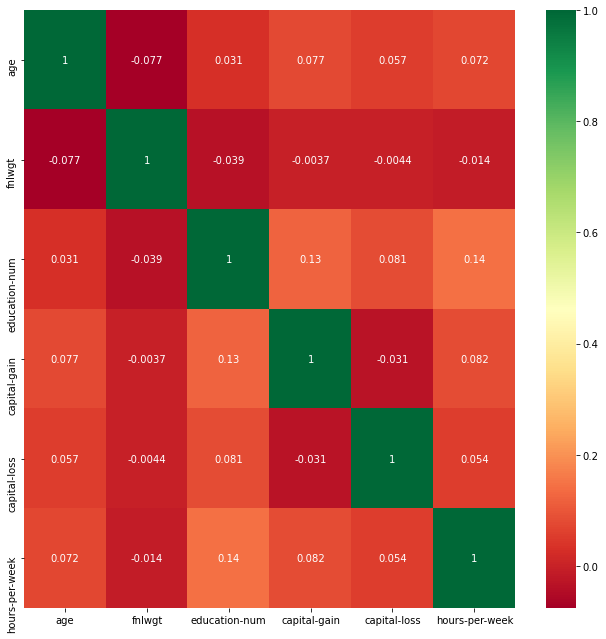

In [11]:
plt.figure(figsize = (11, 11))
g = sns.heatmap(adults_corr, annot = True, cmap = 'RdYlGn')

Observations: 
1. The numerical attributes are **not linearly correlated**, which is a **good** thing.

# Data Prepocessing

## Dealing the Missing Values

In [12]:
# workclass, occupation, native-country are columns with missing values

print('Percentage of missing values for workclass      : {:.3f}%'.format(
    adults['workclass'].isnull().sum() / adults['workclass'].count() * 100))
print('Percentage of missing values for occupation     : {:.3f}%'.format(
    adults['occupation'].isnull().sum() / adults['occupation'].count() * 100))
print('Percentage of missing values for native-country : {:.3f}%'.format(
    adults['native-country'].isnull().sum() / adults['native-country'].count() * 100))

Percentage of missing values for workclass      : 6.079%
Percentage of missing values for occupation     : 6.102%
Percentage of missing values for native-country : 1.786%


Since the percentage of the missing values are all less than 10%, we will choose to **drop** rows with missing values.

In [13]:
adults_noNA = adults.dropna()

print(adults_noNA.isnull().sum())
print('\nTotal Number of Rows Dropped: ' + str(adults.shape[0] - adults_noNA.shape[0]))

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Total Number of Rows Dropped: 3620


## Splitting Dataset into Training and Testing Set

The dataset will be split into X (features) and y (output label)

In [14]:
# Drop the income column
X_pre = adults_noNA.drop('income', axis = 1)
y_pre = adults_noNA['income']

# Balance the dataset using SMOTETENC
smc = SMOTENC(random_state = 42, categorical_features = [1, 3, 5, 6, 7, 8, 9, 13])
X, y = smc.fit_resample(X_pre, y_pre)

# Viewing the dataset
print('Shape of original dataset, adults:', adults.shape)
print('Shape of X:', X.shape, 'type =', type(X))
print('Shape of y:', y.shape, '   type =', type(y))

Shape of original dataset, adults: (48842, 15)
Shape of X: (68028, 14) type = <class 'pandas.core.frame.DataFrame'>
Shape of y: (68028,)    type = <class 'pandas.core.series.Series'>


Viewing the Distribution of The Output Vector

>50K     34014
<=50K    34014
Name: income, dtype: int64 



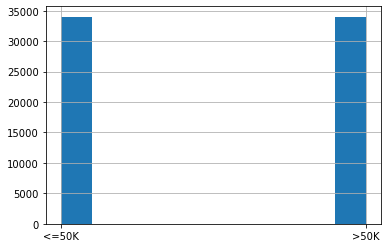

In [15]:
print(y.value_counts(), '\n')

y.hist()
plt.show()

The output set has been balanced through oversampling

Now we split X and y into the training set and the testing set

In [16]:
# Use train_test_split to split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

print('Shape of the original X:', X.shape)
print('Shape of X_train:' , X_train.shape, ' y_train:',y_train.shape)
print('Shape of X_test :' , X_test.shape, ' y_train:',y_test.shape)

Shape of the original X: (68028, 14)
Shape of X_train: (54422, 14)  y_train: (54422,)
Shape of X_test : (13606, 14)  y_train: (13606,)


Now we split X_train into categorical and numerical sets

In [17]:
cat_col = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

X_train_num = X_train.drop(cat_col, axis = 1)
X_train_cat = X_train[cat_col]

print('Shape of X_train_num:', X_train_num.shape)
print('Shape of X_train_cat:', X_train_cat.shape)

Shape of X_train_num: (54422, 6)
Shape of X_train_cat: (54422, 8)


## Normalization

As mentioned in Data Analysis, **Standardization** needs to be performed as the attributes have very different scales

We will make use of StandardScaler(), which is provided by sklearn

In [18]:
scaler = StandardScaler()

X_train_num_tr = scaler.fit_transform(X_train_num)

print(X_train_num_tr.mean (axis = 0))
print(X_train_num_tr.std (axis = 0))

[-1.49362554e-16 -4.23019820e-17 -1.01315858e-16 -6.52808364e-18
 -1.04449338e-18  8.34289089e-17]
[1. 1. 1. 1. 1. 1.]


## One-hot Encoding

`OneHotEncoder` will be used to transform the categorical data

In [19]:
encoder = OneHotEncoder(sparse = False)

X_train_cat_tr_lb = encoder.fit_transform(X_train_cat)

print("Number of features after One-Hot Encoding:", X_train_cat_tr_lb.shape[1])

Number of features after One-Hot Encoding: 98


Finalizing the training set

In [20]:
X_train_complete = np.hstack([X_train_num_tr, X_train_cat_tr_lb])

print('Shape of complete training set:', X_train_complete.shape)

Shape of complete training set: (54422, 104)


## Changing y_train into a Boolean Vector

In [21]:
y_train_more50K = (y_train == '>50K')

# Performing Classification

## Model Selection

We have chosen the following machine learning algorithms for our **Binary Classification** task:
1. Stochastic Gradient Descent Classfier
2. Logistic Regression
3. Linear Discriminant Analysis
4. AdaBoostClassifier

**Linear Discriminant Analysis and AdaBoostClassifier** are classifiers that were not taught in the syllabus. We have implemented these classifiers in this assignment as an effort of self learning

## Stochastic Gradient Descent Classifier

In [22]:
sgd_clf = SGDClassifier(random_state = 42, max_iter = 5000, tol = None)
sgd_clf.fit(X_train_complete, y_train_more50K)
sgd_pred = sgd_clf.predict(X_train_complete)

sgd_train_acc = accuracy_score(y_train_more50K, sgd_pred)

print("Training accuracy: {:.4f}".format(sgd_train_acc))

Training accuracy: 0.8528


## Logistic Regression

In [23]:
logReg = LogisticRegression(random_state = 42, max_iter = 5000)
logReg.fit(X_train_complete, y_train_more50K)
logReg_pred = logReg.predict(X_train_complete)

logReg_train_acc = accuracy_score(y_train_more50K, logReg_pred)

print("Training accuracy: {:.4f}".format(logReg_train_acc))

Training accuracy: 0.8662


## Linear Discriminant Analysis

In [24]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train_complete, y_train_more50K)
lda_pred = lda_clf.predict(X_train_complete)

lda_train_acc = accuracy_score(y_train_more50K, lda_pred)

print("Training accuracy: {:.4f}".format(lda_train_acc))

Training accuracy: 0.8498


## AdaBoostClassifier

In [25]:
ada_clf = AdaBoostClassifier(random_state = 42)
ada_clf.fit(X_train_complete, y_train_more50K)
ada_pred = ada_clf.predict(X_train_complete)

ada_train_acc = accuracy_score(y_train_more50K, ada_pred)

print("Training accuracy: {:.4f}".format(ada_train_acc))

Training accuracy: 0.8735


## Evaluation of Models using Cross-Validation

We will try to detect overfitting through cross-validation

In [ ]:
SGD_k_scores = cross_val_score(sgd_clf, X_train_complete, y_train_more50K, cv = 5, scoring = 'accuracy')
LR_k_scores  = cross_val_score(logReg , X_train_complete, y_train_more50K, cv = 5, scoring = 'accuracy')
LDA_k_scores = cross_val_score(lda_clf, X_train_complete, y_train_more50K, cv = 5, scoring = 'accuracy')
ADA_k_scores = cross_val_score(ada_clf, X_train_complete, y_train_more50K, cv = 5, scoring = 'accuracy')

Now we will print the scores

In [ ]:
print('SGD k-scores:'.ljust(45, ' '), SGD_k_scores)
print('Logistic Regression k-scores:'.ljust(45, ' '), LR_k_scores)
print('Linear Discriminant Analysis k-scores:'.ljust(45, ' '), lda_k_scores)
print('AdaBoostClassifier k-scores:'.ljust(45, ' '), ada_k_scores)

print('\nMean k-scores for SGD:', SGD_k_scores.mean())
print('Mean k-scores for LR :', LR_k_scores.mean())
print('Mean k-scores for LDA:', lda_k_scores.mean())
print('Mean k-scores for ADA:', ada_k_scores.mean())